In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv
/kaggle/input/housing-prices-competition-for-kaggle-learn-users/train.csv
/kaggle/input/housing-prices-competition-for-kaggle-learn-users/test.csv
/kaggle/input/melbourne-housing-snapshot/melb_data.csv
/kaggle/input/house-prices/train_test_analysis.xlsx
/kaggle/input/house-prices/submission.csv
/kaggle/input/house-prices/train.csv
/kaggle/input/house-prices/test.csv
/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
import pandas as pd

df=pd.read_csv('../input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.shape

(34857, 21)

In [4]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
data_corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
data_corr[data_corr['level_0']=='BuildingArea']


,level_0,level_1,0
5,BuildingArea,BuildingArea,1.000000
33,BuildingArea,Landsize,0.354530
64,BuildingArea,Rooms,0.156229
65,BuildingArea,Bedroom2,0.154157
67,BuildingArea,Bathroom,0.147558
79,BuildingArea,Car,0.104373
84,BuildingArea,Price,0.100754
96,BuildingArea,Distance,0.076301
102,BuildingArea,YearBuilt,0.067811
118,BuildingArea,Postcode,0.042437


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df['Price'].isnull().sum()

7610

In [8]:
df.dropna(subset=['Price'],inplace=True)

In [9]:
df.shape

(27247, 21)

In [10]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [11]:
data_corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
data_corr[data_corr['level_0']=='BuildingArea']

,level_0,level_1,0
5,BuildingArea,BuildingArea,1.000000
31,BuildingArea,Landsize,0.375341
65,BuildingArea,Rooms,0.138519
67,BuildingArea,Bedroom2,0.136956
70,BuildingArea,Bathroom,0.129216
77,BuildingArea,Price,0.100754
84,BuildingArea,Car,0.094166
98,BuildingArea,Distance,0.076786
99,BuildingArea,YearBuilt,0.072976
113,BuildingArea,Postcode,0.041697


In [12]:
data_corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
data_corr[data_corr['level_0']=='Price']

,level_0,level_1,0
1,Price,Price,1.000000
21,Price,Rooms,0.465238
23,Price,Bedroom2,0.430275
26,Price,Bathroom,0.429878
38,Price,YearBuilt,0.333306
51,Price,Lattitude,0.215607
54,Price,Distance,0.211384
56,Price,Car,0.201803
58,Price,Longtitude,0.197874
78,Price,BuildingArea,0.100754


In [13]:
df.groupby(['Rooms','Type'])['Bedroom2'].median()

Rooms  Type
1      h        1.0
       t        1.0
       u        1.0
2      h        2.0
       t        2.0
       u        2.0
3      h        3.0
       t        3.0
       u        3.0
4      h        4.0
       t        4.0
       u        4.0
5      h        5.0
       t        5.0
6      h        6.0
       u        4.0
7      h        7.0
8      h        8.0
       u        4.0
9      h        NaN
10     h       10.0
12     h       12.0
16     h       16.0
Name: Bedroom2, dtype: float64

In [14]:
df['Bedroom2']=df.groupby('Rooms')['Bedroom2'].apply(lambda x: x.fillna(x.median()))

In [15]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             1
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [16]:
df.groupby(['Rooms','Type'])['Bathroom'].median()

Rooms  Type
1      h       1.0
       t       1.0
       u       1.0
2      h       1.0
       t       1.0
       u       1.0
3      h       1.0
       t       2.0
       u       2.0
4      h       2.0
       t       2.0
       u       2.0
5      h       3.0
       t       2.0
6      h       3.0
       u       2.0
7      h       3.0
8      h       4.0
       u       2.0
9      h       NaN
10     h       6.0
12     h       5.0
16     h       8.0
Name: Bathroom, dtype: float64

In [17]:
df['Bathroom']=df.groupby('Rooms')['Bathroom'].apply(lambda x: x.fillna((x.median())/2))

In [18]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             1
Bathroom             1
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [19]:
df.groupby(['Bedroom2','Type'])['Car'].median()

Bedroom2  Type
0.0       h       1.0
          t       1.0
          u       0.0
1.0       h       1.0
          t       1.0
          u       1.0
2.0       h       1.0
          t       1.0
          u       1.0
3.0       h       2.0
          t       2.0
          u       1.0
4.0       h       2.0
          t       2.0
          u       2.0
5.0       h       2.0
          t       2.0
          u       2.5
6.0       h       2.0
7.0       h       2.0
8.0       h       3.5
          u       NaN
9.0       h       4.0
10.0      h       4.5
12.0      h       3.0
16.0      h       8.0
20.0      h       2.0
Name: Car, dtype: float64

In [20]:
df['Car']=df.groupby('Rooms')['Car'].apply(lambda x: x.fillna((4.0)))

In [21]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             1
Bathroom             1
Car                  0
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [22]:
df.groupby(['Postcode'])['Lattitude'].median()

Postcode
3000.0   -37.812435
3002.0   -37.815250
3003.0   -37.808200
3006.0   -37.826700
3008.0   -37.814100
            ...    
3910.0   -38.155750
3975.0   -38.054200
3976.0   -38.033780
3977.0   -38.094655
3978.0   -38.112450
Name: Lattitude, Length: 209, dtype: float64

In [23]:
df['Longtitude']=df.groupby('Postcode')['Longtitude'].apply(lambda x: x.fillna((x.median())))

In [24]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             1
Bathroom             1
Car                  0
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude           2
Regionname           3
Propertycount        3
dtype: int64

In [25]:
df.groupby(['Landsize'])['BuildingArea'].median()

Landsize
0.0          73.0
1.0          62.0
2.0           NaN
3.0         131.0
5.0           NaN
            ...  
75100.0       NaN
76000.0       NaN
89030.0       NaN
146699.0      NaN
433014.0      NaN
Name: BuildingArea, Length: 1557, dtype: float64

<AxesSubplot:ylabel='Landsize'>

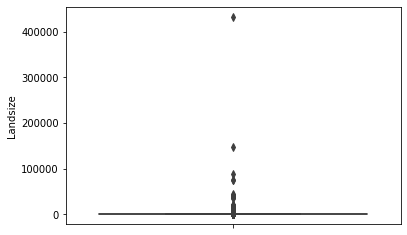

In [26]:
sns.boxplot(y='Landsize',data=df)

<AxesSubplot:ylabel='BuildingArea'>

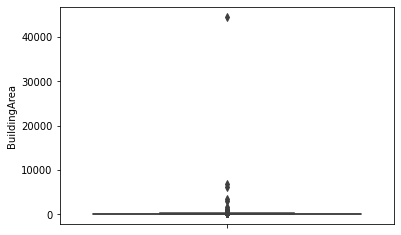

In [27]:
sns.boxplot(y='BuildingArea',data=df)

In [28]:
data=df['BuildingArea'].value_counts()

In [29]:
data.values==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,